## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [ ]:
df = pd.read_csv(r'/content/CC GENERAL.csv')


In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df = df.fillna(0)

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df = pd.get_dummies(df)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ssd = []
sil_list = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)

    # Get cluster labels correctly
    cluster_labels = model.fit_predict(scaled_df)

    # Calculate silhouette score
    sil = silhouette_score(scaled_df, cluster_labels)

    # Append results
    sil_list.append(sil)
    ssd.append(model.inertia_)


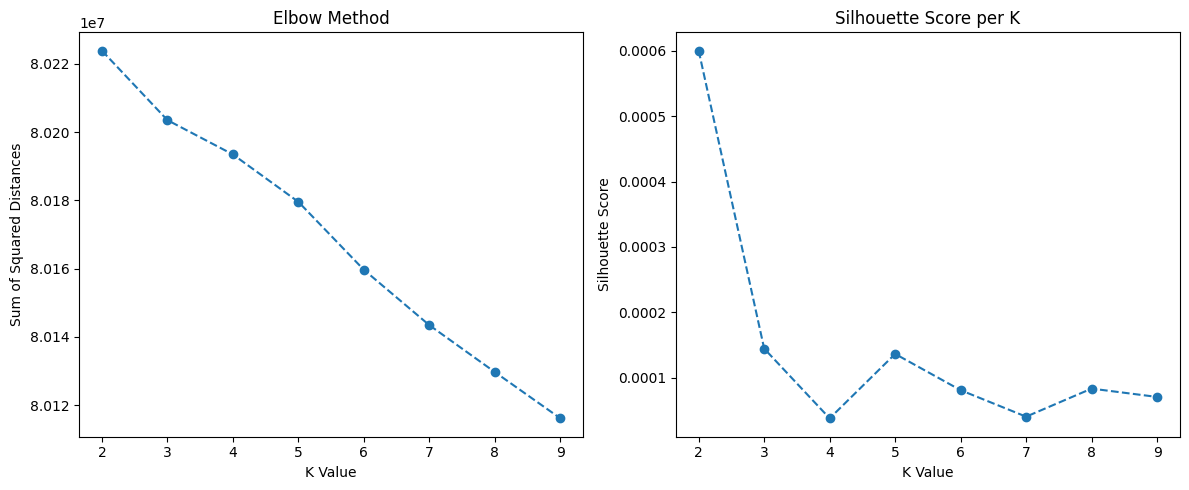

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  # 1 row, 2 columns

# First subplot (Sum of Squared Distances)
axes[0].plot(range(2,10), ssd, 'o--')
axes[0].set_xlabel("K Value")
axes[0].set_ylabel("Sum of Squared Distances")
axes[0].set_title("Elbow Method")

# Second subplot (Silhouette Score)
axes[1].plot(range(2,10), sil_list, 'o--')
axes[1].set_xlabel("K Value")
axes[1].set_ylabel("Silhouette Score")
axes[1].set_title("Silhouette Score per K")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Choose the optimal K and calculate the silhouette score for the best model.

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [ ]:
from sklearn.cluster import AgglomerativeClustering


In [ ]:
s=[]
linkage_list=["average","single"]
affinity_list=["euclidean","manhattan","cosine"]
n=np.arange(2,20)
best=-1
best_affinity=" "
best_n=1
best_linkage= " "
for n_clusters in n:
    for affinity in affinity_list:
           for linkage in linkage_list:
                model = AgglomerativeClustering(n_clusters=n_clusters, metric=affinity, linkage=linkage)
                model = model.fit(scaled_df)
                silhouette=silhouette_score(scaled_df,model.labels_)#,metric='euclidean')
                s.append(silhouette)
                #print("Silhouette Score for number of clusters = "+ str(n_clusters)+ " "+str(affinity)+" and "+str(linkage)+" is "+str(silhouette)+".")
                if silhouette >= best:
                    best_n=n_clusters
                    best =silhouette
                    best_affinity=affinity
                    best_linkage=linkage
print("Best agglomerative clustering model for this data is number of clusters="+" " + str(best_n)+" " +"with linkage of "
      +str(best_linkage)+" and affinity of "+str(best_affinity)+"." "Silhouette Score is "+str(best)+".")

Choose the optimal K and calculate the silhouette score for the best model.

In [ ]:
model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage = "average")
cluster_labels = model.fit_predict(scaled_df)
silhouette_score(scaled_df, cluster_labels)

## DBSCAN

Find the optimal DBSCAN model.

In [ ]:
from sklearn.cluster import DBSCAN


Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [ ]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):

    # Create Model
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(scaled_df)


    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)

    outlier_percent.append(perc_outliers)

In [ ]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

from sklearn.metrics import silhouette_score
silhouette_score(scaled_df, cluster_labels)

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?

In [ ]:
#we will choose the model with the highest silhouette score